In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/'

In [12]:
sample = pd.read_csv(path + 'sample.csv')
test = pd.read_csv(path + 'test.csv', sep=';')
train = pd.read_csv(path + 'train.csv', sep=';')

In [13]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


# Data Preprocessing

In [14]:
for i in [train, test]:
    i['brand'] = i.name.str.split(n=1, expand=True)[0]

for i in [train, test]:
    i['brand_extend'] = i.name.str.split(n=2, expand=True)[0] +' ' + i.name.str.split(n=2, expand=True)[1]

for i in [train, test]:
    i['n_mileage'] = i.mileage.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_engine'] = i.engine.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_max_power'] = (i.max_power.str.split(pat='b', n=1, expand=True)[0]).str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['torque_nm'] = (((((i.torque.str.split(pat='N', n=1, expand=True)[0]).str.split(pat='n', n=1, expand=True)[0]).str.split(pat='@', n=1, expand=True)[0]).str.split(pat='k', n=1, expand=True)[0]).str.split(n=1, expand=True)[0]).str.split(pat='(', n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    for j in i[i.torque.str.contains('kgm', na=False)].index:
        i.torque_nm[j] = i.torque_nm[j] * 10

In [15]:
for i in [train, test]:
    i['n_owner'] = i['owner'].copy()
    i['n_owner'].replace(to_replace='First Owner', value=1, inplace=True)
    i['n_owner'].replace(to_replace='Second Owner', value=2, inplace=True)
    i['n_owner'].replace(to_replace='Third Owner', value=3, inplace=True)
    i['n_owner'].replace(to_replace='Fourth & Above Owner', value=4, inplace=True)
    i['n_owner'].replace(to_replace='Test Drive Car', value=-1, inplace=True)

In [16]:
for i in [train, test]:
    i['brand_price'] = i['brand'].copy()
    for j in i.brand.unique():
        i['brand_price'].replace(to_replace=j, value = train[train.brand == j].selling_price.mean()/100000, inplace=True)

In [17]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,torque,seats,brand,brand_extend,n_mileage,n_engine,n_max_power,torque_nm,n_owner,brand_price
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,260Nm@ 1500-2750rpm,5.0,Tata,Tata Nexon,21.50,1497.0,108.50,260.00,1,3.689275
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,219.66nm@ 1500-2750rpm,5.0,Hyundai,Hyundai i20,21.19,1396.0,88.76,219.66,1,4.542093
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,360Nm@ 1400-3200rpm,7.0,Toyota,Toyota Fortuner,12.55,2982.0,168.50,360.00,2,9.519480
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,154.9Nm@ 4200rpm,5.0,Hyundai,Hyundai Verna,17.01,1591.0,121.30,154.90,1,4.542093
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,400Nm,5.0,Volvo,Volvo XC40,18.00,1969.0,190.00,400.00,1,32.175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,90Nm@ 3500rpm,5.0,Maruti,Maruti A-Star,19.00,998.0,66.10,90.00,1,4.033088
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,77Nm@ 3500rpm,5.0,Maruti,Maruti Wagon,26.60,998.0,58.16,77.00,1,4.033088
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,114Nm@ 3500rpm,5.0,Tata,Tata Tigor,20.30,1199.0,84.00,114.00,1,3.689275
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,180Nm@ 1440-1500rpm,9.0,Mahindra,Mahindra Bolero,15.96,2523.0,63.00,180.00,2,6.177663


In [18]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,torque,seats,brand,brand_extend,n_mileage,n_engine,n_max_power,torque_nm,n_owner,brand_price
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,153Nm@ 3800rpm,5.0,Skoda,Skoda Rapid,14.30,1598.0,103.50,153.00,1,6.358441
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,145Nm@ 4600rpm,5.0,Honda,Honda City,17.80,1497.0,117.30,145.00,1,5.956358
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,114Nm@ 4000rpm,5.0,Hyundai,Hyundai Xcent,19.10,1197.0,82.00,114.00,1,4.542093
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,290Nm@ 1800-2800rpm,7.0,Mahindra,Mahindra Scorpio,12.05,2179.0,120.00,290.00,1,6.177663
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,215Nm@ 1750-2500rpm,5.0,Ford,Ford Ecosport,21.70,1498.0,98.96,215.00,1,5.212743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,113.75Nm@ 4000rpm,5.0,Hyundai,Hyundai Grand,20.70,1197.0,81.86,113.75,1,4.542093
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,190Nm@ 2000rpm,5.0,Maruti,Maruti Swift,28.40,1248.0,74.02,190.00,2,4.033088
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,85Nm@ 2500rpm,5.0,Tata,Tata Indica,17.88,1396.0,52.80,85.00,2,3.689275
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,259.9Nm@ 1900-2750rpm,5.0,Hyundai,Hyundai Creta,19.67,1582.0,126.20,259.90,2,4.542093


C:\Users\khoat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


year                AxesSubplot(0.125,0.536818;0.133621x0.343182)
selling_price    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
km_driven         AxesSubplot(0.44569,0.536818;0.133621x0.343182)
seats            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
n_mileage        AxesSubplot(0.766379,0.536818;0.133621x0.343182)
n_engine               AxesSubplot(0.125,0.125;0.133621x0.343182)
n_max_power         AxesSubplot(0.285345,0.125;0.133621x0.343182)
torque_nm            AxesSubplot(0.44569,0.125;0.133621x0.343182)
n_owner             AxesSubplot(0.606034,0.125;0.133621x0.343182)
brand_price         AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

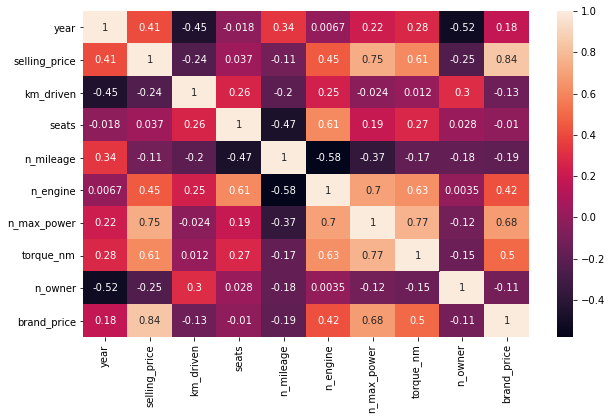

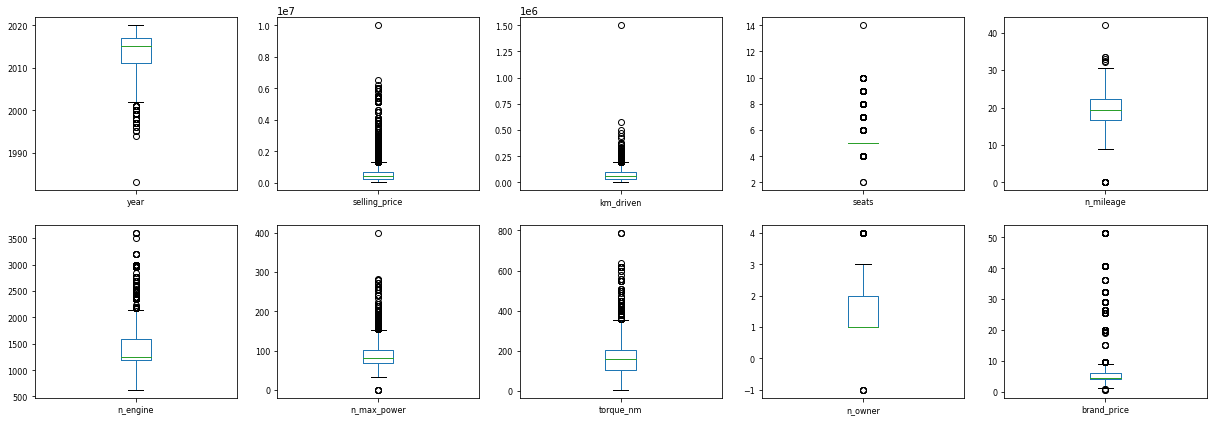

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

fig = plt.figure(figsize = (21,7))
ax = fig.gca()
train.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False, fontsize=8, ax=ax)

In [20]:
#train = train[train['selling_price'] < 9000000]

In [21]:
#train = pd.concat([train, pd.get_dummies(train.brand, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.fuel, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.transmission, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.seller_type, drop_first=True)], axis=1)

#test = pd.concat([test, pd.get_dummies(test.brand, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.fuel, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.transmission, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.seller_type, drop_first=True)], axis=1)

In [22]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,108.50,260.00,1,3.689275,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,88.76,219.66,1,4.542093,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,168.50,360.00,2,9.519480,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,121.30,154.90,1,4.542093,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,190.00,400.00,1,32.175000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,66.10,90.00,1,4.033088,0,0,1,1,1,0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,58.16,77.00,1,4.033088,0,0,0,1,1,0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,84.00,114.00,1,3.689275,0,0,1,1,1,0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,63.00,180.00,2,6.177663,1,0,0,1,1,0


In [23]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,103.50,153.00,1,6.358441,0,0,1,0,0,0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,117.30,145.00,1,5.956358,0,0,1,1,1,0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,82.00,114.00,1,4.542093,0,0,1,1,1,0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,120.00,290.00,1,6.177663,1,0,0,1,1,0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,98.96,215.00,1,5.212743,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,81.86,113.75,1,4.542093,0,0,1,1,0,0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,74.02,190.00,2,4.033088,1,0,0,1,1,0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,52.80,85.00,2,3.689275,1,0,0,1,1,0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,126.20,259.90,2,4.542093,1,0,0,1,1,0


<AxesSubplot:title={'center':'selling_price'}, xlabel='brand'>

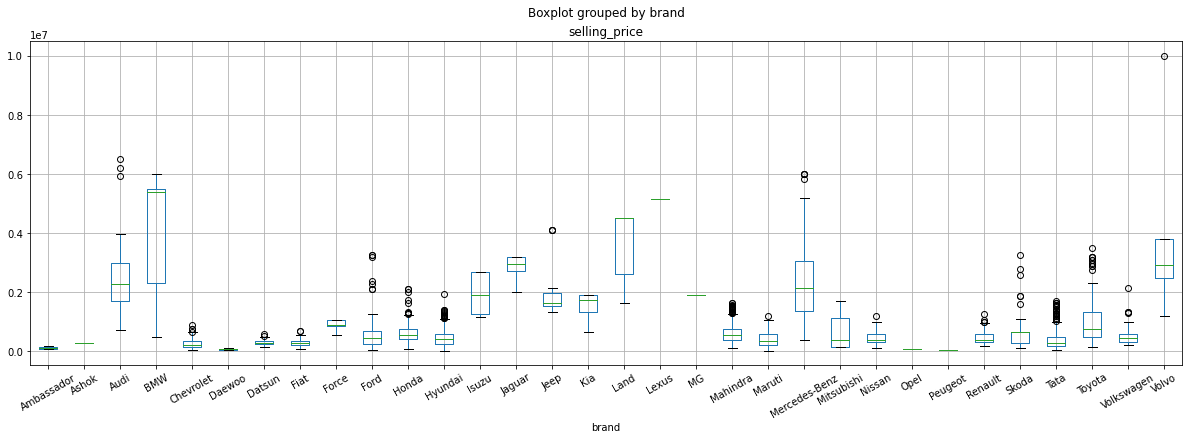

In [24]:
train.boxplot(column='selling_price', by='brand', figsize=(20,6), rot=30)

In [25]:
for i in [train, test]:
    i.fillna(i.mean(),inplace=True)

# Build model

In [26]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,108.50,260.00,1,3.689275,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,88.76,219.66,1,4.542093,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,168.50,360.00,2,9.519480,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,121.30,154.90,1,4.542093,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,190.00,400.00,1,32.175000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,66.10,90.00,1,4.033088,0,0,1,1,1,0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,58.16,77.00,1,4.033088,0,0,0,1,1,0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,84.00,114.00,1,3.689275,0,0,1,1,1,0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,63.00,180.00,2,6.177663,1,0,0,1,1,0


In [27]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,103.50,153.00,1,6.358441,0,0,1,0,0,0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,117.30,145.00,1,5.956358,0,0,1,1,1,0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,82.00,114.00,1,4.542093,0,0,1,1,1,0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,120.00,290.00,1,6.177663,1,0,0,1,1,0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,98.96,215.00,1,5.212743,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,81.86,113.75,1,4.542093,0,0,1,1,0,0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,74.02,190.00,2,4.033088,1,0,0,1,1,0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,52.80,85.00,2,3.689275,1,0,0,1,1,0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,126.20,259.90,2,4.542093,1,0,0,1,1,0


In [28]:
x = train.drop(['name','fuel','selling_price','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_mileage'], axis=1)
y = train['selling_price']

In [29]:
x

,year,km_driven,seats,n_engine,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2018,9500,5.0,1497.0,108.50,260.00,1,3.689275,1,0,0,1,1,0
1,2018,30000,5.0,1396.0,88.76,219.66,1,4.542093,1,0,0,1,1,0
2,2015,80000,7.0,2982.0,168.50,360.00,2,9.519480,1,0,0,0,1,0
3,2015,35000,5.0,1591.0,121.30,154.90,1,4.542093,0,0,1,1,1,0
4,2019,20000,5.0,1969.0,190.00,400.00,1,32.175000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,50000,5.0,998.0,66.10,90.00,1,4.033088,0,0,1,1,1,0
5996,2018,40000,5.0,998.0,58.16,77.00,1,4.033088,0,0,0,1,1,0
5997,2018,75000,5.0,1199.0,84.00,114.00,1,3.689275,0,0,1,1,1,0
5998,2011,100000,9.0,2523.0,63.00,180.00,2,6.177663,1,0,0,1,1,0


In [30]:
x_test = test.drop(['Id','name','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_mileage'], axis=1)

In [31]:
x_test

,year,km_driven,seats,n_engine,n_max_power,torque_nm,n_owner,brand_price,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2016,11000,5.0,1598.0,103.50,153.00,1,6.358441,0,0,1,0,0,0
1,2017,35000,5.0,1497.0,117.30,145.00,1,5.956358,0,0,1,1,1,0
2,2014,80000,5.0,1197.0,82.00,114.00,1,4.542093,0,0,1,1,1,0
3,2014,145241,7.0,2179.0,120.00,290.00,1,6.177663,1,0,0,1,1,0
4,2015,92651,5.0,1498.0,98.96,215.00,1,5.212743,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2020,2000,5.0,1197.0,81.86,113.75,1,4.542093,0,0,1,1,0,0
2124,2018,100000,5.0,1248.0,74.02,190.00,2,4.033088,1,0,0,1,1,0
2125,2011,172000,5.0,1396.0,52.80,85.00,2,3.689275,1,0,0,1,1,0
2126,2017,47000,5.0,1582.0,126.20,259.90,2,4.542093,1,0,0,1,1,0


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

result = pd.DataFrame(columns=['max_depth', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(20,31):
    extra_tree = RandomForestRegressor(random_state=42, max_depth=i, n_estimators=50)
    extra_tree.fit(x_train,y_train)

    train_pred = extra_tree.predict(x_train)
    val_pred = extra_tree.predict(x_val)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_r2 = metrics.r2_score(y_train, train_pred)
    val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
    val_r2 = metrics.r2_score(y_val, val_pred)

    result = result.append(pd.Series({'max_depth': i, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result.sort_values(by='Val_RMSE')

In [35]:
result1 = pd.DataFrame(columns=['max_depth', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(10,20):
    extra_tree = ExtraTreesRegressor(random_state=42, max_depth=i, n_estimators=100)
    extra_tree.fit(x_train,y_train)

    train_pred = extra_tree.predict(x_train)
    val_pred = extra_tree.predict(x_val)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_r2 = metrics.r2_score(y_train, train_pred)
    val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
    val_r2 = metrics.r2_score(y_val, val_pred)

    result1 = result1.append(pd.Series({'max_depth': i, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result1.sort_values(by='Val_RMSE')

,max_depth,Train_RMSE,Train_R^2,Val_RMSE,Val_R^2
3,13.0,58656.608249,0.994724,113143.865506,0.980128
5,15.0,43012.860888,0.997163,114078.931573,0.979799
8,18.0,28066.639061,0.998792,114614.288558,0.979609
9,19.0,24349.224130,0.999091,114821.710880,0.979535
4,14.0,50441.908282,0.996099,114911.236240,0.979503
7,17.0,31983.187414,0.998431,116220.536228,0.979033
6,16.0,37846.847879,0.997804,116606.696778,0.978893
2,12.0,67798.075221,0.992952,120650.353583,0.977404
1,11.0,77905.767440,0.990694,120677.448973,0.977394
0,10.0,87704.033565,0.988205,124946.025516,0.975766


In [29]:
result2 = pd.DataFrame(columns=['n_es', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(80,101):
    extra_tree = ExtraTreesRegressor(random_state=42, max_depth=15, n_estimators=i)
    extra_tree.fit(x_train,y_train)

    train_pred = extra_tree.predict(x_train)
    val_pred = extra_tree.predict(x_val)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_r2 = metrics.r2_score(y_train, train_pred)
    val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
    val_r2 = metrics.r2_score(y_val, val_pred)

    result2 = result2.append(pd.Series({'n_es': i, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result2.sort_values(by='Val_RMSE')

,n_es,Train_RMSE,Train_R^2,Val_RMSE,Val_R^2
7,87.0,41392.261053,0.997373,118492.179402,0.978205
8,88.0,41438.964822,0.997367,118597.089663,0.978167
10,90.0,41527.955713,0.997356,118597.504597,0.978167
12,92.0,41434.993249,0.997367,118712.969765,0.978124
9,89.0,41528.657437,0.997356,118760.574928,0.978106
11,91.0,41483.453648,0.997361,118794.777534,0.978094
6,86.0,41353.685381,0.997378,118884.141066,0.978061
13,93.0,41510.376449,0.997358,118918.935257,0.978048
5,85.0,41360.031711,0.997377,118958.423185,0.978033
1,81.0,41408.773688,0.997371,119004.743842,0.978016


In [37]:
result3 = pd.DataFrame(columns=['max_depth','n_es', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(13,16):
    for j in range(40,100):
        extra_tree = ExtraTreesRegressor(random_state=42, max_depth=i, n_estimators=j)
        extra_tree.fit(x_train,y_train)

        train_pred = extra_tree.predict(x_train)
        val_pred = extra_tree.predict(x_val)

        train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
        train_r2 = metrics.r2_score(y_train, train_pred)
        val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
        val_r2 = metrics.r2_score(y_val, val_pred)

        result3 = result3.append(pd.Series({'max_depth': i,'n_es': j, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result3.sort_values(by='Val_RMSE')

,max_depth,n_es,Train_RMSE,Train_R^2,Val_RMSE,Val_R^2
3,13.0,43.0,58373.097541,0.994775,110280.652282,0.981121
2,13.0,42.0,58654.796822,0.994725,110479.680455,0.981053
0,13.0,40.0,58439.972488,0.994763,110699.680492,0.980978
1,13.0,41.0,58388.169483,0.994772,110727.245057,0.980968
4,13.0,44.0,58448.240713,0.994762,111846.428350,0.980581
...,...,...,...,...,...,...
120,15.0,40.0,42320.815660,0.997254,116163.433185,0.979054
122,15.0,42.0,42489.635454,0.997232,116252.340793,0.979021
125,15.0,45.0,42526.431661,0.997227,116506.179730,0.978930
124,15.0,44.0,42456.550819,0.997236,116646.761861,0.978879


In [38]:
extra_tree = ExtraTreesRegressor(random_state=42, max_depth=13, n_estimators=43)
extra_tree.fit(x_train,y_train)

ExtraTreesRegressor(max_depth=13, n_estimators=43, random_state=42)

In [39]:
train_pred = extra_tree.predict(x_train)
val_pred = extra_tree.predict(x_val)

In [40]:
print('Train set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2 :', metrics.r2_score(y_train, train_pred))
print('')
print('Validation set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, val_pred)))
print('R^2 :', metrics.r2_score(y_val, val_pred))

Train set:
RMSE: 58373.097540822404
R^2 : 0.9947751801821373

Validation set:
RMSE: 110280.65228239175
R^2 : 0.9811213818169406


In [41]:
test_pred = extra_tree.predict(x_test)

In [42]:
submit = sample.copy()

In [43]:
submit.Predicted = test_pred

In [44]:
submit

,Id,Predicted
0,1,648456.743849
1,2,846982.571937
2,3,409193.538136
3,4,624812.025593
4,5,530870.044497
...,...,...
2123,2124,645146.735802
2124,2125,649027.575892
2125,2126,183826.815703
2126,2127,856819.973968


In [45]:
submit.to_csv(path_or_buf= path + 'submit_14_12_1.csv', index=False)